In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

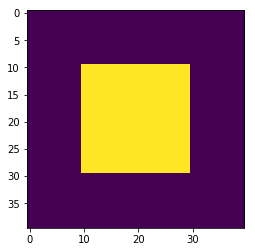

In [2]:
arr = np.zeros([40,40])
arr[10:30,10:30] = 1
plt.imshow(arr)
transformed = np.fft.fft2(arr)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

#Parameters to set
mu_x = 0
variance_x = .1

mu_y = 0
variance_y = .1

#Create grid and multivariate normal
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])



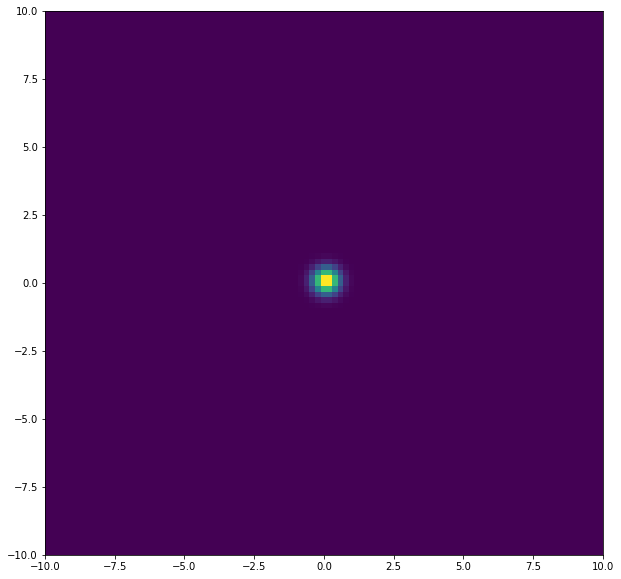

In [4]:
#Make a 3D plot
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
ax.pcolor(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
plt.show()

In [5]:
arr = rv.pdf(pos)
transformed = np.fft.fft2(arr,s= [100,100])

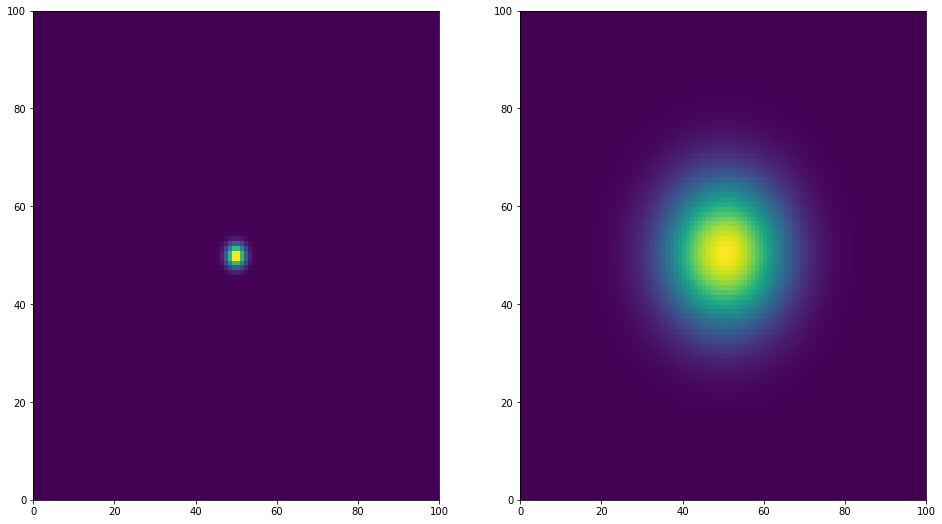

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,9))
ax1.pcolor(arr)
ax2.pcolor(np.abs(np.fft.fftshift(transformed)))
# plt.xlim([-5,5])
# plt.ylim([-5,5])
# ax2.colorbar()
plt.show()

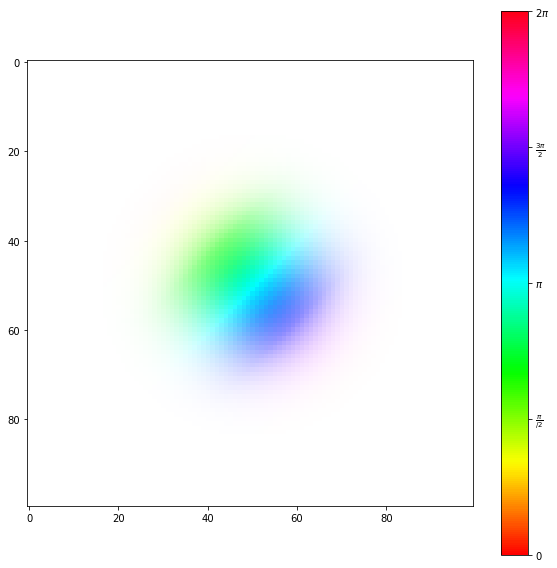

In [54]:
def r_theta(arr):
    r = np.real(np.sqrt(arr * np.conj(arr)))
    theta = (np.arctan(np.imag(arr)/(np.real(arr)))+np.pi/2)*2
    return r, theta
def phase_ints_plot(arr, cb=True):
    """
    inputs:
        arr: An array of complex numbers. This should be fftshifted already
        cb: Do you want to show a vertical colorbar. Default True
    outputs:
        A plot following kevin cowtan's convention
    """
    r, theta = r_theta(arr)
    norm = plt.Normalize()

    disp_arr = cm.hsv(norm(theta))
    disp_arr[:,:,-1] = r/np.max(r)
    fig, ax = plt.subplots(figsize=(10,10))
    if cb:#Relabel the colorbar without actually rescaling theta to be in [0,2pi]
        cax = ax.imshow(disp_arr,cmap='hsv')
        cbar = fig.colorbar(cax,ticks=np.linspace(0,1,5))
        cbar.ax.set_yticklabels([r"0",r"$\frac{\pi}{def 2}$",r"$\pi$",r"$\frac{3\pi}{2}$",r"$2\pi$"])
    else:
        ax.imshow(disp_arr, cmap='hsv')
    plt.show()
phase_ints_plot(np.fft.fftshift(transformed))

In [42]:
#This doesnt work yet - not sure if countourf will eventually be the right way to go or not
def draw_colorwheel():
    """ Draw a colorwheel according to Cowtan's convention
        r represents the alpha value in [0,1] 
        theta shows the colormap hsv scaled to [0,2pi]"""
    
    theta = np.linspace(0,2*np.pi,100)
    r = np.linspace(0,1,100)
    R,T = np.meshgrid(r,theta)
    #vals = R*T
    fig, ax = plt.subplots(subplot_kw=dict(projection='polar'),figsize=(10,10))
    cax = ax.contourf(T, R, T,100, cmap="hsv")
    ax.set_rmax(1)
    ax.set_rticks([0.25,0.5,0.75,1])  # less radial ticks
    #ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line
    ax.grid(True)
    plt.title(r"Color Convention", fontsize=16)
    plt.show()
#draw_colorwheel()